## Final Data Dive

In [1]:
# Import Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import missingno as msno
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler as sc
from numpy import arange
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None) #allows for up to 200 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows', None)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

# trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\mwarl\AppData\Local\Temp\ipykernel_15440\2953620254.py:31: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # a style that can be used for plots - see style reference above
C:\Users\mwarl\AppData\Local\Temp\ipykernel_15440\2953620254.py:34: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# Read in the file
df_Ca = pd.read_csv("./College_Admission_data.csv", index_col = 0, header = 0)
df_Ca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, Alabama A & M University to Polytechnic University of Puerto Rico-Orlando
Columns: 107 entries, Applicants total to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(97), object(10)
memory usage: 1.3+ MB


In [3]:
df_Ca.head()


Applicants total  Admissions total  \
Name                                                                      
Alabama A & M University                       6142.0            5521.0   
University of Alabama at Birmingham            5689.0            4934.0   
Amridge University                                NaN               NaN   
University of Alabama in Huntsville            2054.0            1656.0   
Alabama State University                      10245.0            5251.0   

                                     Enrolled total  \
Name                                                  
Alabama A & M University                     1104.0   
University of Alabama at Birmingham          1773.0   
Amridge University                              NaN   
University of Alabama in Huntsville           651.0   
Alabama State University                     1479.0   

                                     Percent of freshmen submitting SAT scores  \
Name                                                                             
Alabama A & M University                                                  15.0   
University of Alabama at Birmingham                                        6.0   
Amridge University                                                         NaN   
University of Alabama in Huntsville                                       34.0   
Alabama State University                                                  18.0   

                                     Percent of freshmen submitting ACT scores  \
Name                                                                             
Alabama A & M University                                                  88.0   
University of Alabama at Birmingham                                       93.0   
Amridge University                                                         NaN   
University of Alabama in Huntsville                                       94.0   
Alabama State University                                                  87.0   

                                     SAT Critical Reading 25th percentile score  \
Name                                                                              
Alabama A & M University                                                  370.0   
University of Alabama at Birmingham                                       520.0   
Amridge University                                                          NaN   
University of Alabama in Huntsville                                       510.0   
Alabama State University                                                  380.0   

                                     SAT Critical Reading 75th percentile score  \
Name                                                                              
Alabama A & M University                                                  450.0   
University of Alabama at Birmingham                                       640.0   
Amridge University                                                          NaN   
University of Alabama in Huntsville                                       640.0   
Alabama State University                                                  480.0   

                                     SAT Math 25th percentile score  \
Name                                                                  
Alabama A & M University                                      350.0   
University of Alabama at Birmingham                           520.0   
Amridge University                                              NaN   
University of Alabama in Huntsville                           510.0   
Alabama State University                                      370.0   

                                     SAT Math 75th percentile score  \
Name                                                                  
Alabama A & M University                                      450.0   
University of Alabama at Birmingham                           650.0   
Amridge University           

<Axes: >

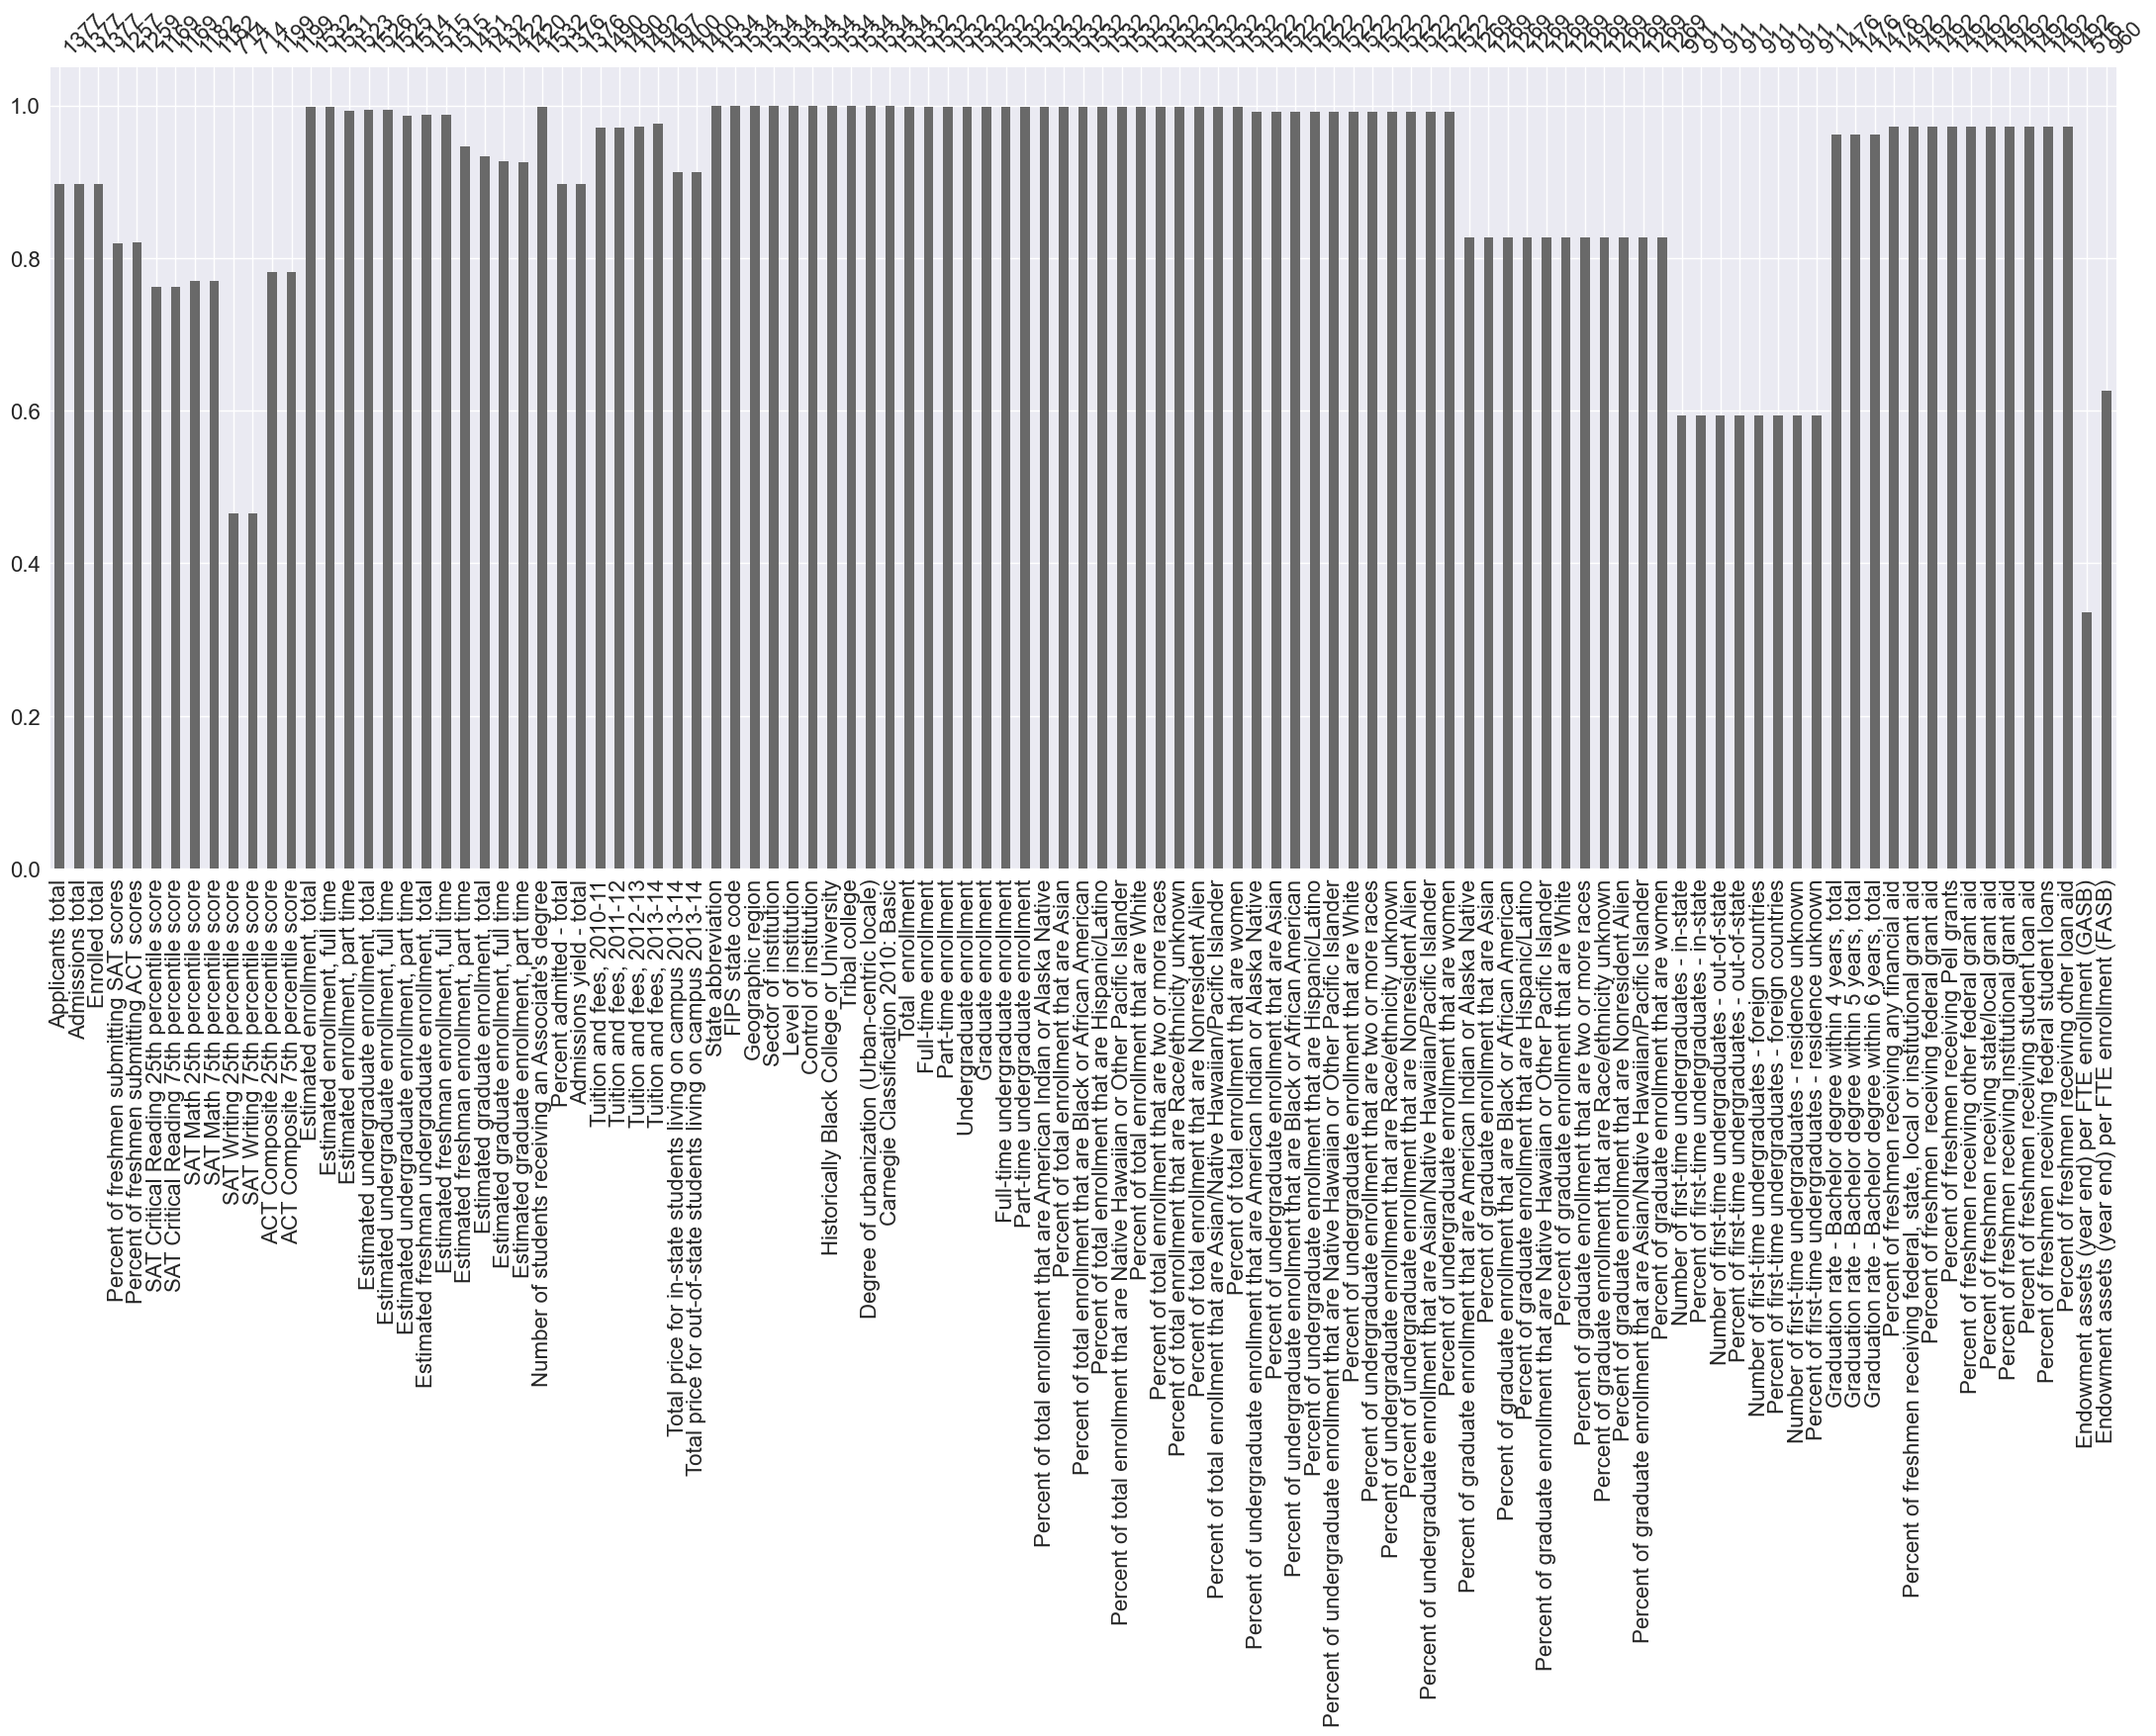

In [4]:
msno.bar(df_Ca)

In [5]:
# Get dummy variables for all categorical data
df_Ca = pd.get_dummies(df_Ca)

In [6]:
# Before data imputation, let's see how many rows and columns we have
df_Ca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, Alabama A & M University to Polytechnic University of Puerto Rico-Orlando
Columns: 237 entries, Applicants total to Carnegie Classification 2010: Basic_Research Universities (very high research activity)
dtypes: float64(97), uint8(140)
memory usage: 1.4+ MB


## Data Imputation

In [7]:
missing_values = df_Ca.isnull().sum()

# Create a DataFrame to display column names and corresponding missing value counts
missing_info = pd.DataFrame({
    'Column_Name': missing_values.index,
    'Missing_Values': missing_values.values
})

# Display columns with missing values
print("Columns with missing values:")
print(missing_info[missing_info['Missing_Values'] > 0])

Columns with missing values:
                                          Column_Name  Missing_Values
0                                    Applicants total             157
1                                    Admissions total             157
2                                      Enrolled total             157
3           Percent of freshmen submitting SAT scores             277
4           Percent of freshmen submitting ACT scores             275
5          SAT Critical Reading 25th percentile score             365
6          SAT Critical Reading 75th percentile score             365
7                      SAT Math 25th percentile score             352
8                      SAT Math 75th percentile score             352
9                   SAT Writing 25th percentile score             820
10                  SAT Writing 75th percentile score             820
11                ACT Composite 25th percentile score             335
12                ACT Composite 75th percentile score        

In [8]:
# We decided to remove rows with that are missing data for Applicant total, Admissions total, and Enrolled total because these are curtial statistics in our mind that vary wildly. 

columns_to_check = ['Applicants total', 'Admissions total', 'Enrolled total']

# Remove rows with missing values in the specified columns
df_Ca = df_Ca.dropna(subset=columns_to_check)

# Reset the index after dropping rows
df_Ca = df_Ca.reset_index(drop=True)

In [9]:
missing_values = df_Ca.isnull().sum()

# Create a DataFrame to display column names and corresponding missing value counts
missing_info = pd.DataFrame({
    'Column_Name': missing_values.index,
    'Missing_Values': missing_values.values
})

# Display columns with missing values
print("Columns with missing values:")
print(missing_info[missing_info['Missing_Values'] > 0])

Columns with missing values:
                                          Column_Name  Missing_Values
3           Percent of freshmen submitting SAT scores             120
4           Percent of freshmen submitting ACT scores             118
5          SAT Critical Reading 25th percentile score             208
6          SAT Critical Reading 75th percentile score             208
7                      SAT Math 25th percentile score             195
8                      SAT Math 75th percentile score             195
9                   SAT Writing 25th percentile score             663
10                  SAT Writing 75th percentile score             663
11                ACT Composite 25th percentile score             178
12                ACT Composite 75th percentile score             178
15                    Estimated enrollment, part time               3
18      Estimated undergraduate enrollment, part time               5
21           Estimated freshman enrollment, part time        

In [10]:
# Next, we decided to drop the columns that have more than 300 missing values.
# These rows tend to be very specific and cannot be easily imputed with a mean or zero.

threshold = 300

# Drop columns with more than 300 missing values
df_Ca = df_Ca.dropna(thresh=len(df_Ca) - threshold, axis=1)

In [11]:
# Check missing values again
missing_values = df_Ca.isnull().sum()

# Create a DataFrame to display column names and corresponding missing value counts
missing_info = pd.DataFrame({
    'Column_Name': missing_values.index,
    'Missing_Values': missing_values.values
})

# Display columns with missing values
print("Columns with missing values:")
print(missing_info[missing_info['Missing_Values'] > 0])

Columns with missing values:
                                          Column_Name  Missing_Values
3           Percent of freshmen submitting SAT scores             120
4           Percent of freshmen submitting ACT scores             118
5          SAT Critical Reading 25th percentile score             208
6          SAT Critical Reading 75th percentile score             208
7                      SAT Math 25th percentile score             195
8                      SAT Math 75th percentile score             195
9                 ACT Composite 25th percentile score             178
10                ACT Composite 75th percentile score             178
13                    Estimated enrollment, part time               3
16      Estimated undergraduate enrollment, part time               5
19           Estimated freshman enrollment, part time              56
20               Estimated graduate enrollment, total              83
21           Estimated graduate enrollment, full time        

In [12]:
# For the rest of these columns we decided to use the mean value to fill in the na's
# We didn't want to just get rid of the columns and even though some are missing over 200, we felt that it filling in the the mean value should produce accurate results
numeric_columns = df_Ca.select_dtypes(include=['float64']).columns
df_Ca[numeric_columns] = df_Ca[numeric_columns].fillna(df_Ca[numeric_columns].mean())

In [13]:
# We should see that there are no more missing values
missing_values = df_Ca.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [14]:
# Show how many rows and columns we have left
df_Ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Columns: 225 entries, Applicants total to Carnegie Classification 2010: Basic_Research Universities (very high research activity)
dtypes: float64(85), uint8(140)
memory usage: 1.1 MB


## More EDA

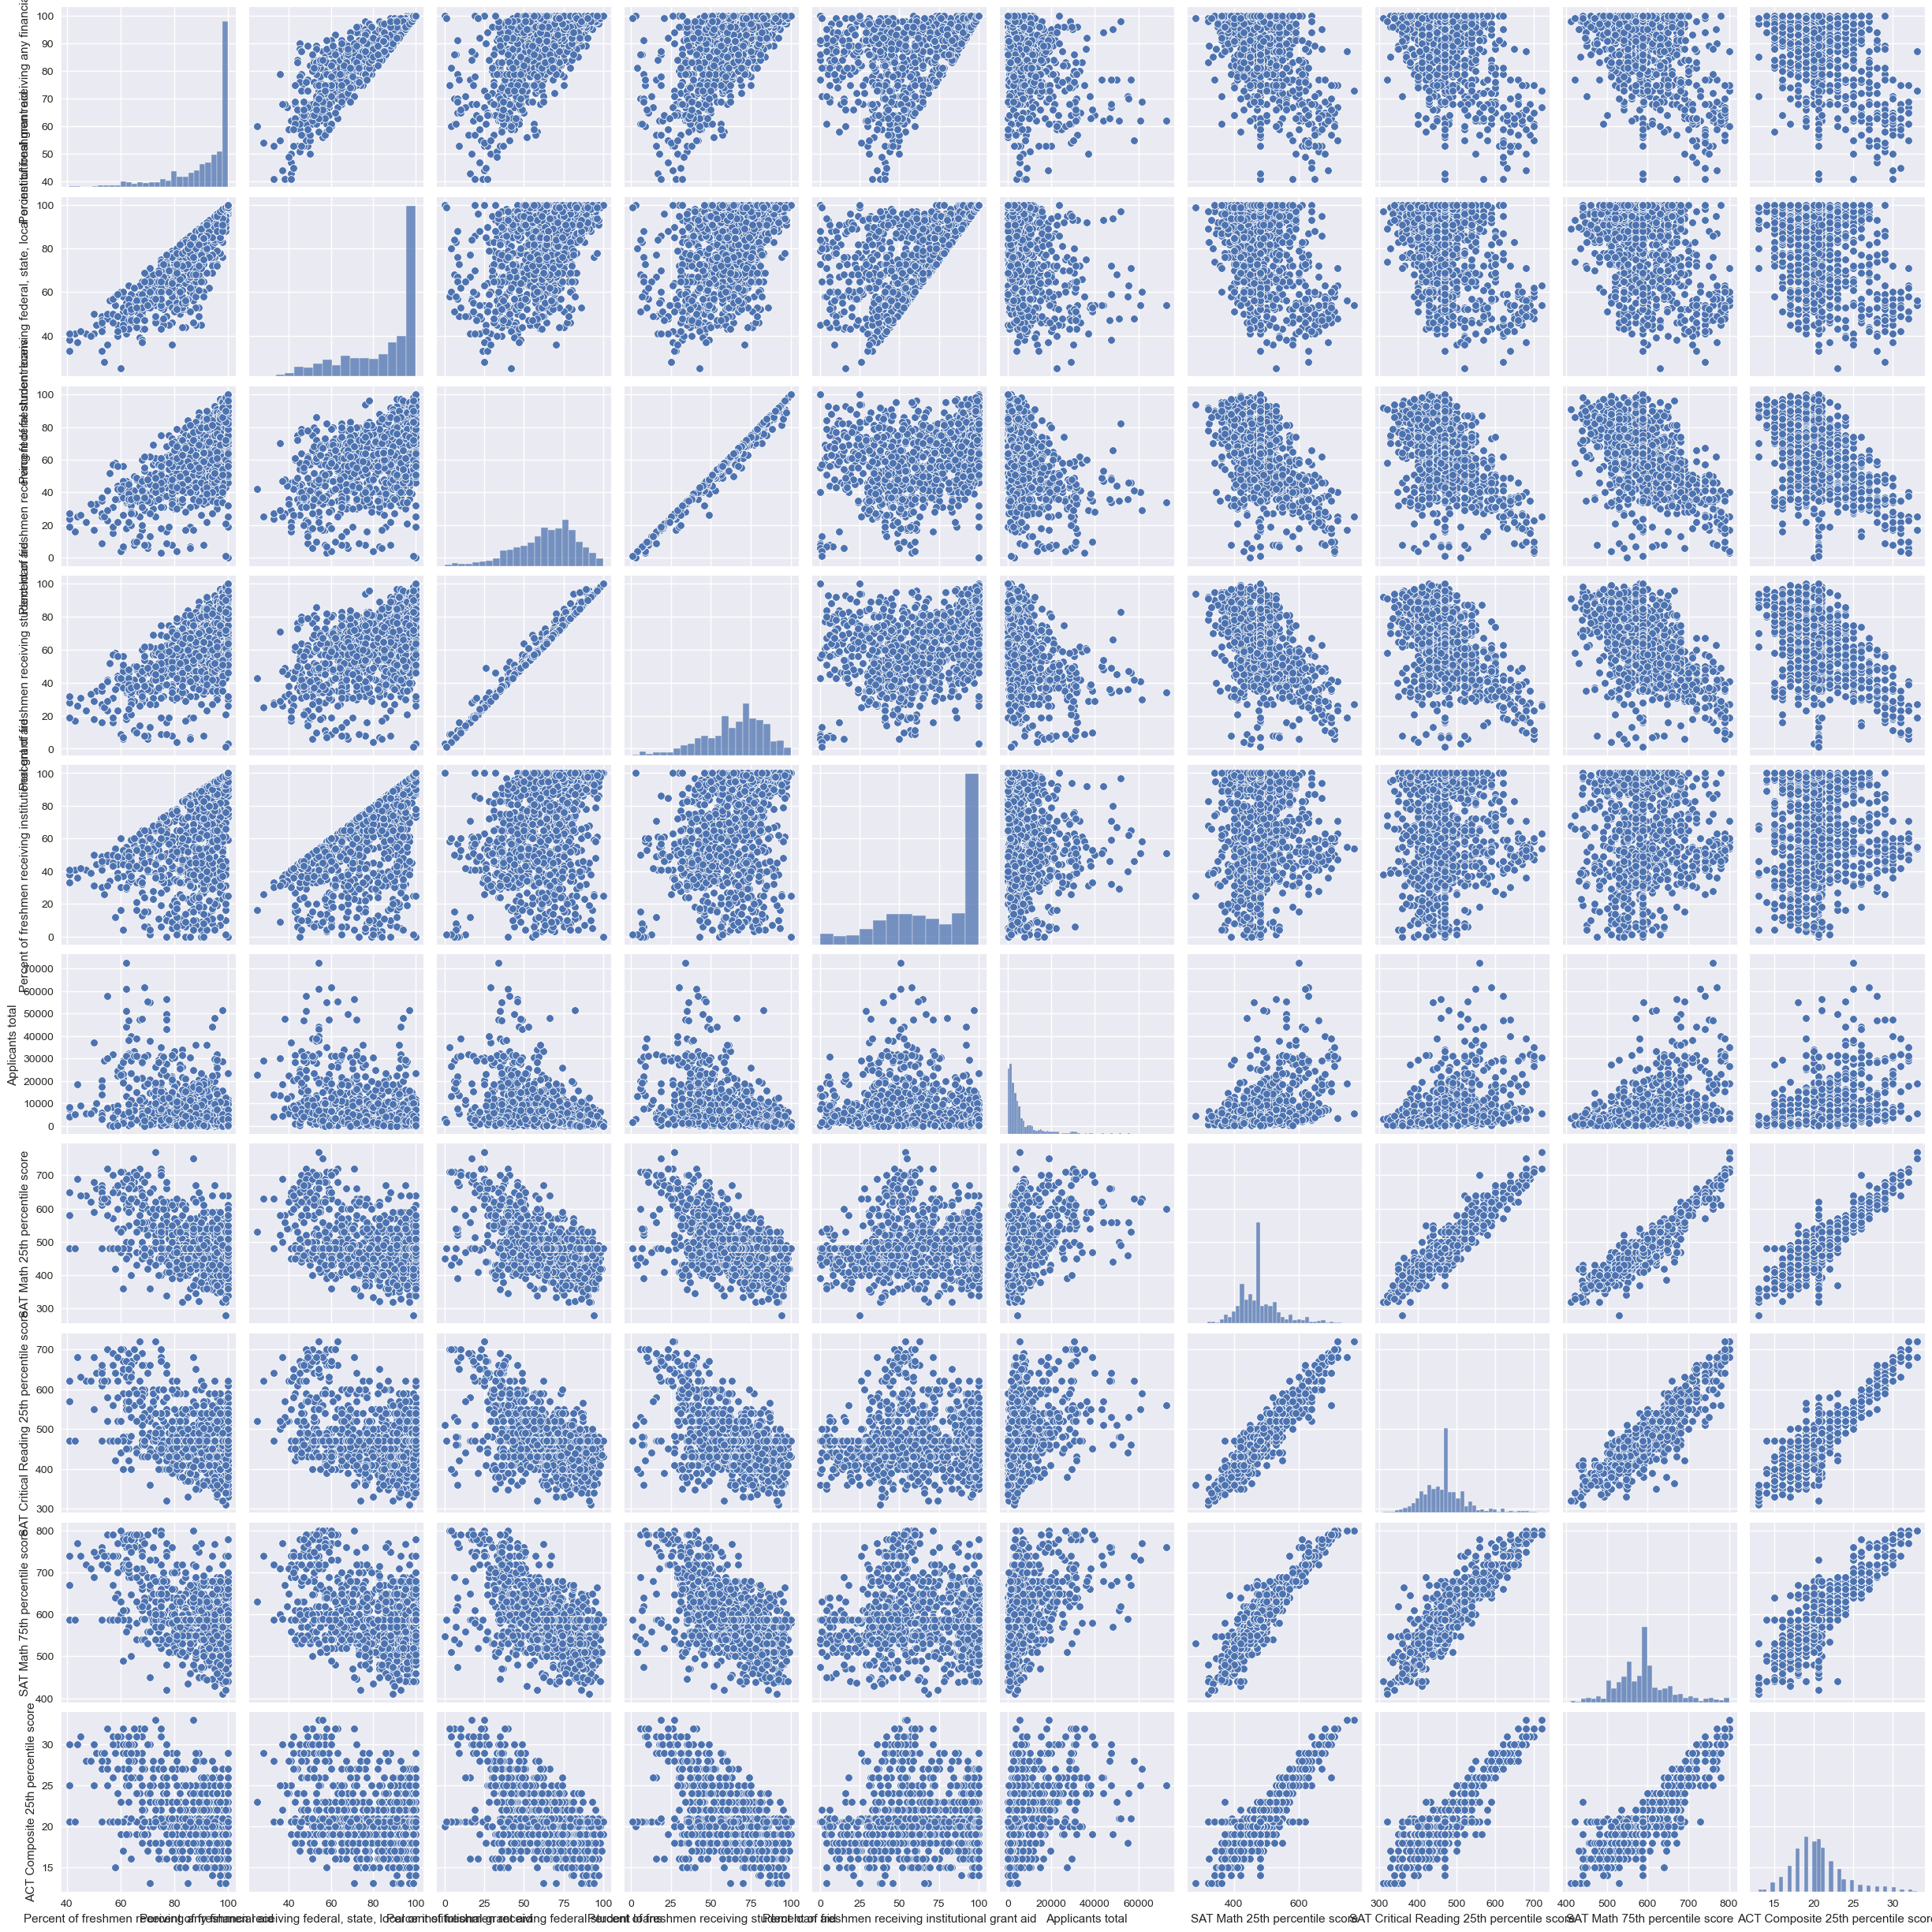

In [15]:
# Assuming df_Ca is your DataFrame with numeric columns
numeric_columns = df_Ca.select_dtypes(include=['float64']).columns

# Select the top ten numeric columns based on correlation with the target variable or other criteria
top_ten_columns = df_Ca[numeric_columns].corr().abs().nlargest(10, 'Percent of freshmen receiving any financial aid')['Percent of freshmen receiving any financial aid'].index

# Create pair plots for the top ten columns
sns.pairplot(df_Ca[top_ten_columns])
plt.show()

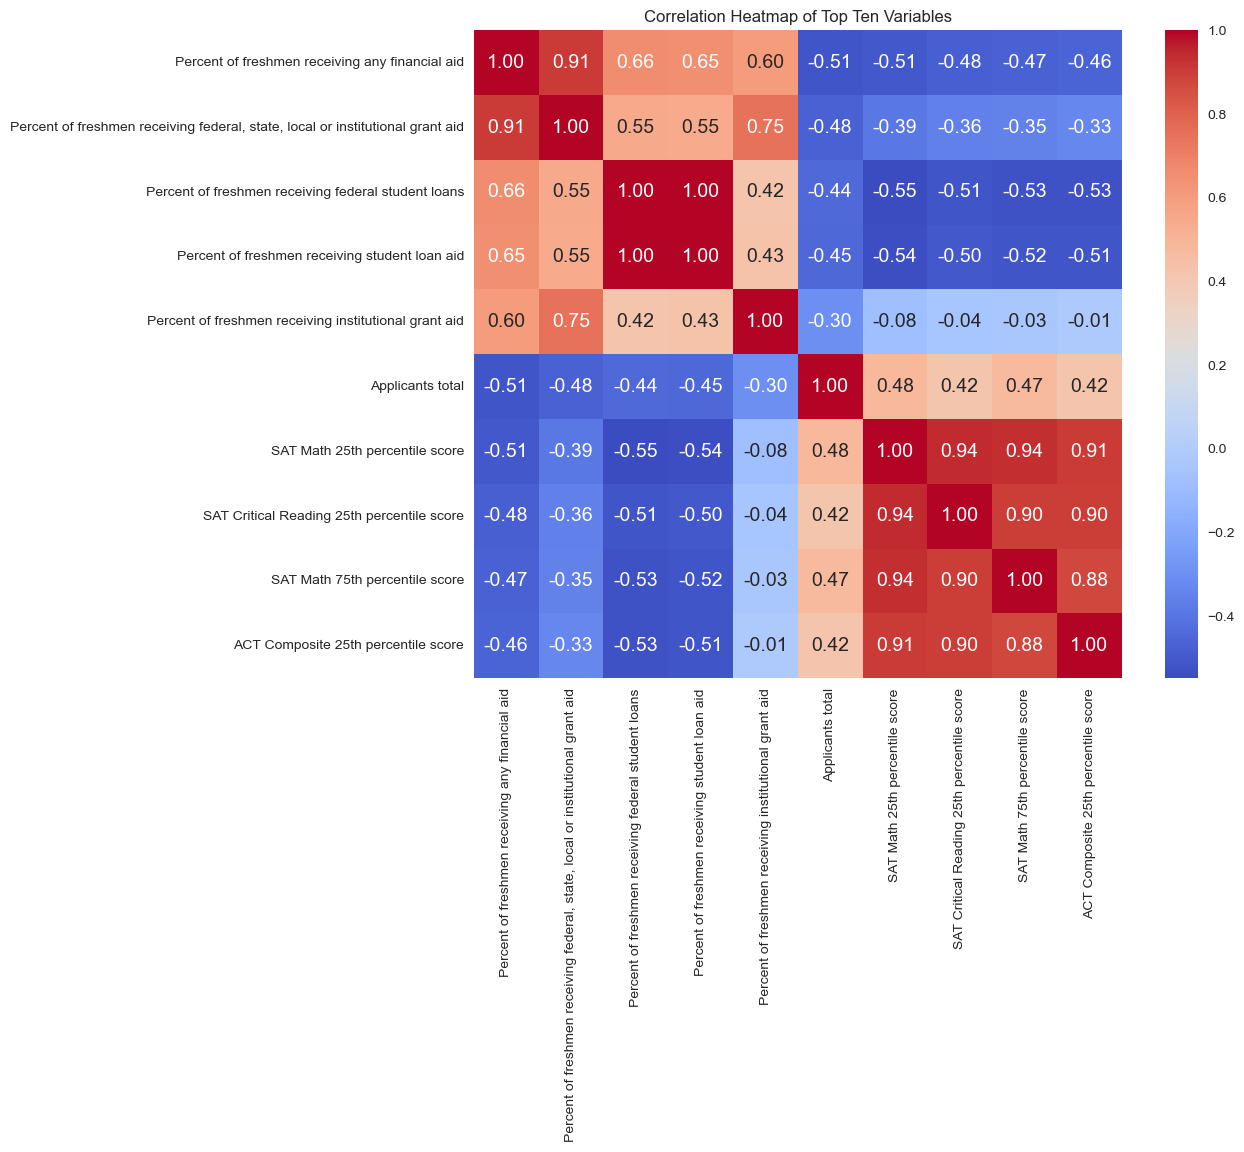

In [16]:
numeric_columns = df_Ca.select_dtypes(include=['float64']).columns

# Select the top ten numeric columns based on correlation
top_ten_columns = df_Ca[numeric_columns].corr().abs().nlargest(10, 'Percent of freshmen receiving any financial aid')['Percent of freshmen receiving any financial aid'].index

# Calculate the correlation matrix for the top ten columns
correlation_matrix = df_Ca[top_ten_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Top Ten Variables')
plt.show()

## Split the data and create our y as a categorical variable

In [17]:
# Calculate the mean of the financial aid column
mean_value = df_Ca['Percent of freshmen receiving any financial aid'].mean()

# Set 'Percent of freshmen receiving any financial aid' to 1 if above the mean, 0 otherwise
df_Ca['Freshmen_Fin_Aid'] = (df_Ca['Percent of freshmen receiving any financial aid'] > mean_value).astype(int)

# Display the updated DataFrame
print(df_Ca[['Freshmen_Fin_Aid']])

      Freshmen_Fin_Aid
0                    1
1                    0
2                    0
3                    1
4                    0
5                    0
6                    0
7                    1
8                    1
9                    1
10                   1
11                   1
12                   1
13                   0
14                   0
15                   1
16                   1
17                   1
18                   1
19                   1
20                   0
21                   1
22                   1
23                   1
24                   0
25                   1
26                   0
27                   1
28                   1
29                   1
30                   1
31                   0
32                   1
33                   1
34                   1
35                   1
36                   1
37                   1
38                   1
39                   1
40                   1
41                   1
42         

In [18]:
# See what the average value is 
print(mean_value)

90.77931536780771


In [19]:
# Assign the x and y variables
# Drop the columns that are too similar in X

y = df_Ca['Freshmen_Fin_Aid']
X = df_Ca.drop(['Percent of freshmen receiving any financial aid', 
                'Percent of freshmen receiving federal, state, local or institutional grant aid', 
                'Percent of freshmen receiving student loan aid', 
                'Percent of freshmen receiving institutional grant aid', 
                'Percent of freshmen receiving federal student loans',
                'Percent of freshmen receiving state/local grant aid',
                'Freshmen_Fin_Aid'
               ], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 2 Logistic regression

In [20]:
# 3. Fit a logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# 4. Get the coefficients/importance of each predictor
coefficients = logreg_model.coef_[0]
feature_importance = list(zip(X_train.columns, np.abs(coefficients)))



C:\Users\mwarl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Write the logistic regression equation
print('Logistic Regression Equation:')

# Intercept
intercept = logreg_model.intercept_[0]
print('Intercept:', intercept)

# Coefficients for each feature
for feature, coefficient in zip(X_train.columns, logreg_model.coef_[0]):
    print(f"{coefficient:.4f} * {feature} + ")

Logistic Regression Equation:
Intercept: 2.99293644083323e-06
-0.0003 * Applicants total + 
0.0004 * Admissions total + 
0.0003 * Enrolled total + 
-0.0001 * Percent of freshmen submitting SAT scores + 
0.0005 * Percent of freshmen submitting ACT scores + 
0.0006 * SAT Critical Reading 25th percentile score + 
0.0010 * SAT Critical Reading 75th percentile score + 
0.0006 * SAT Math 25th percentile score + 
0.0010 * SAT Math 75th percentile score + 
0.0000 * ACT Composite 25th percentile score + 
0.0000 * ACT Composite 75th percentile score + 
0.0004 * Estimated enrollment, total + 
0.0000 * Estimated enrollment, full time + 
0.0004 * Estimated enrollment, part time + 
0.0001 * Estimated undergraduate enrollment, total + 
-0.0003 * Estimated undergraduate enrollment, full time + 
0.0004 * Estimated undergraduate enrollment, part time + 
-0.0000 * Estimated freshman undergraduate enrollment, total + 
0.0005 * Estimated freshman enrollment, full time + 
-0.0006 * Estimated freshman enroll

In [22]:
# 6. Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# 8. Print or use the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7922705314009661
Confusion Matrix:
 [[ 73  66]
 [ 20 255]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.53      0.63       139
           1       0.79      0.93      0.86       275

    accuracy                           0.79       414
   macro avg       0.79      0.73      0.74       414
weighted avg       0.79      0.79      0.78       414

ROC AUC Score: 0.7262262916939177


## SUMMARY REQUIRED

## Step 3 Decision Tree

In [23]:
# Create the tree, fit the tree, and make the predictions
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

In [24]:
# Get feature importances
feature_importance = list(zip(X_test.columns, dt_classifier.feature_importances_))

# Sort feature importances in descending order
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
print("Feature Importance (Descending Order):")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

Feature Importance (Descending Order):
Estimated undergraduate enrollment, full time: 0.2154
Tuition and fees, 2010-11: 0.1202
Tuition and fees, 2011-12: 0.0509
Percent of freshmen  receiving federal grant aid: 0.0498
Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander: 0.0400
Percent of graduate enrollment that are Hispanic/Latino: 0.0369
Admissions yield - total: 0.0365
SAT Critical Reading 25th percentile score: 0.0305
Percent of freshmen submitting SAT scores: 0.0255
Percent of freshmen receiving Pell grants: 0.0237
State abbreviation_Florida: 0.0225
Estimated graduate enrollment, part time: 0.0194
Estimated freshman enrollment, part time: 0.0184
Applicants total: 0.0170
Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander: 0.0167
Carnegie Classification 2010: Basic_Doctoral/Research Universities: 0.0165
Tuition and fees, 2013-14: 0.0165
Full-time enrollment: 0.0150
ACT Composite 75th percentile score: 0.0115
Total price for in

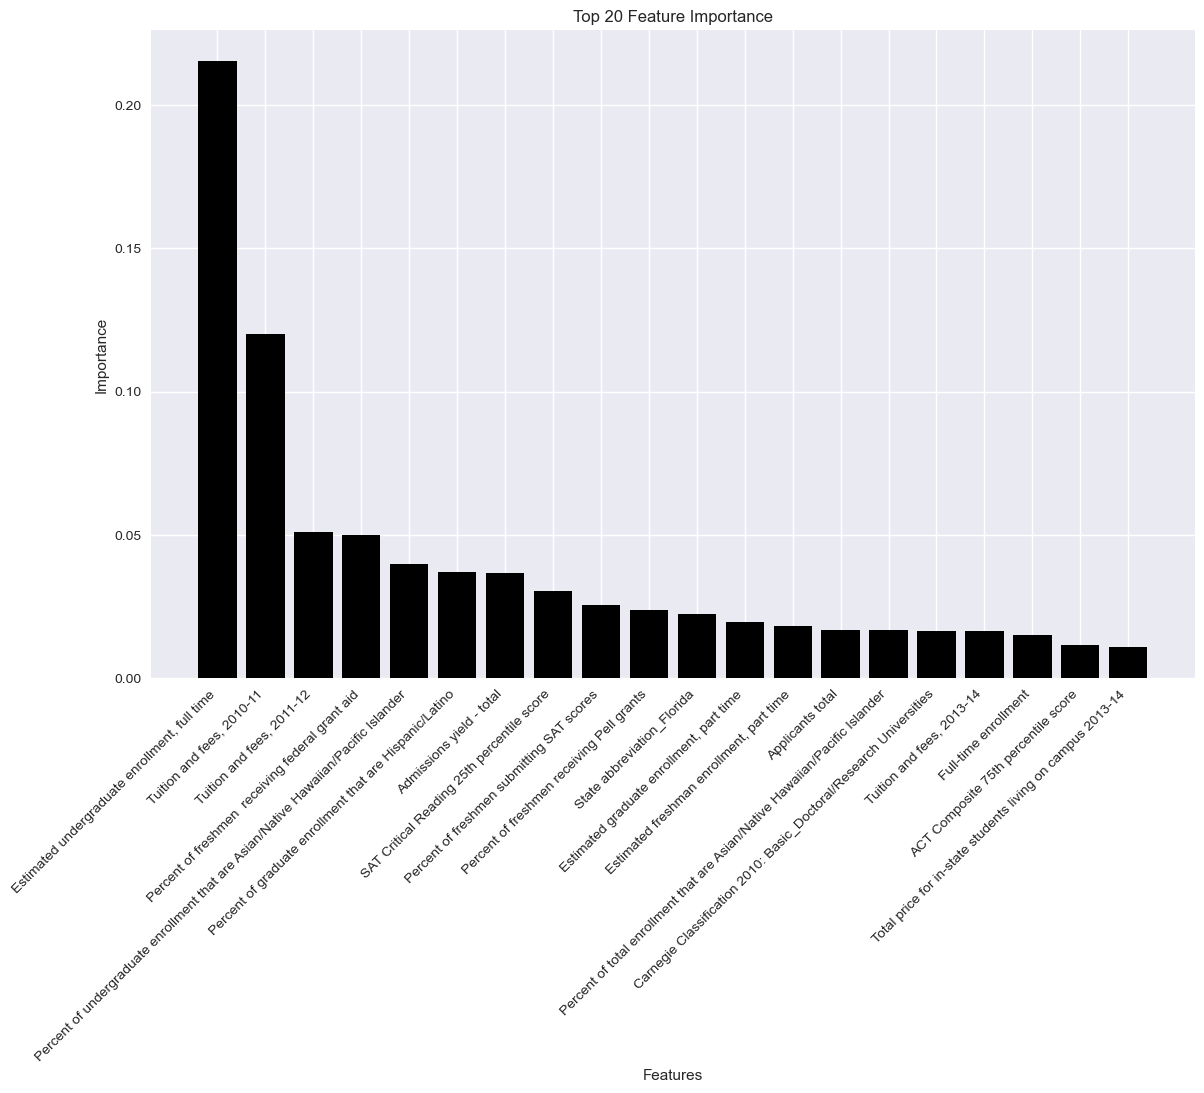

In [25]:
# Get the top 20 feature importances
top_features = feature_importance[:20]

# Extract feature names and importances for the top 20 features
top_feature_names, top_importances = zip(*top_features)

# Create a bar plot for the top 20 features
plt.figure(figsize=(12, 8))
plt.bar(top_feature_names, top_importances, color='black')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 20 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

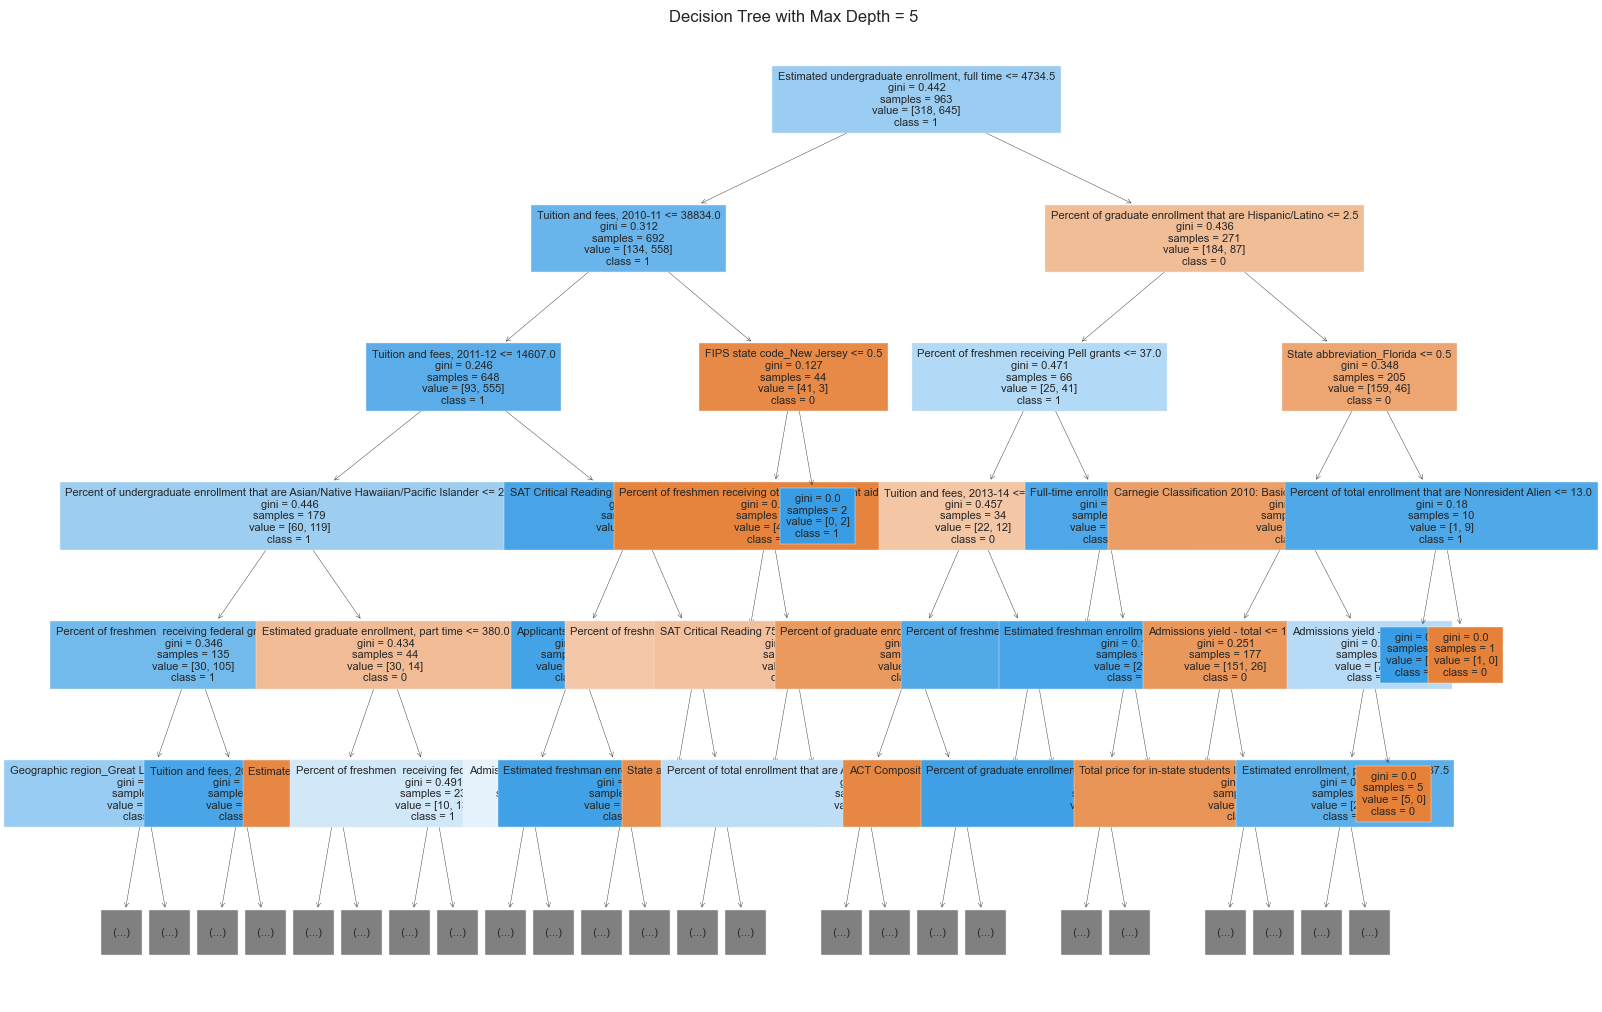

In [26]:
plt.figure(figsize=(16, 12))
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=['0', '1'], max_depth=5, fontsize=8)
plt.title("Decision Tree with Max Depth = 5")
plt.show()

Iteration 1 done
Iteration 2 done
Iteration 3 done
Iteration 4 done
Iteration 5 done
Iteration 6 done
Iteration 7 done
Iteration 8 done
Iteration 9 done
Iteration 10 done
Iteration 11 done
Iteration 12 done
Iteration 13 done
Iteration 14 done
Iteration 15 done
Iteration 16 done
Iteration 17 done
Iteration 18 done
Iteration 19 done
Iteration 20 done
Iteration 21 done
Iteration 22 done
Iteration 23 done
Iteration 24 done
Iteration 25 done
Iteration 26 done
Iteration 27 done
Iteration 28 done
Iteration 29 done


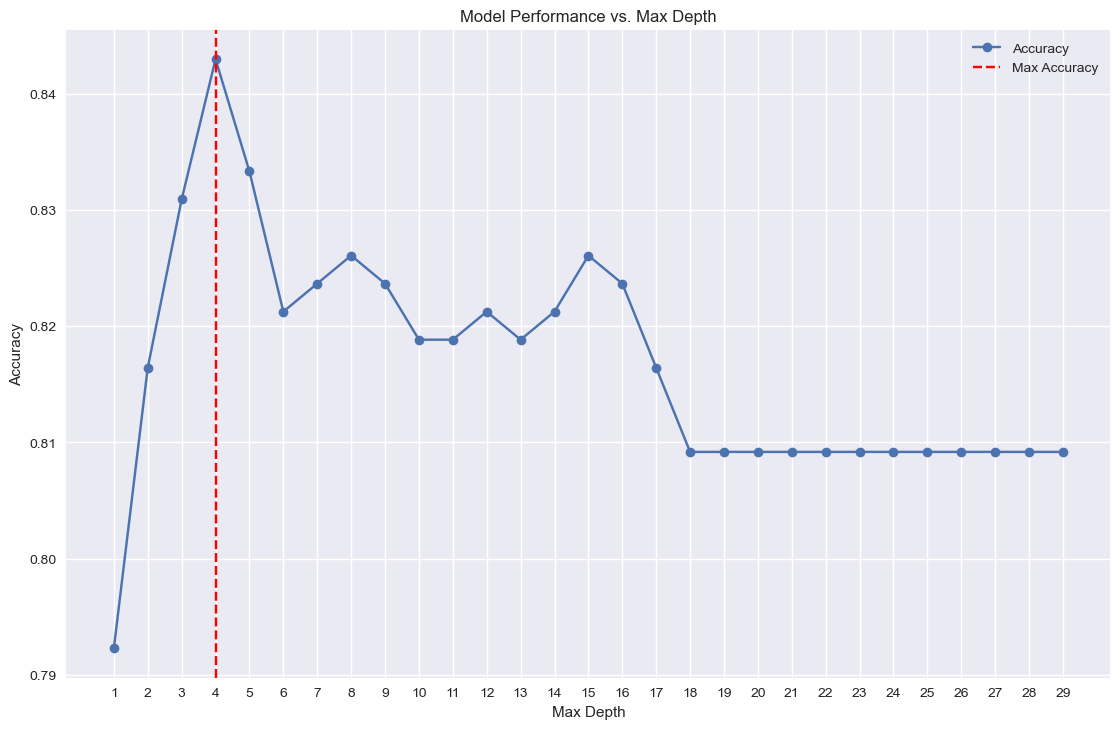

In [27]:
max_depths = range(1, 30)
scores = []

# Train Decision Tree models with different max depths
for depth in max_depths:
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=21)
    classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_test, y_test))
    print(f"Iteration {depth} done")

# Find the index of max accuracy
max_accuracy_index = scores.index(max(scores))

# Plot accuracy vs. max depth
plt.figure(figsize=(12, 8))
plt.plot(max_depths, scores, '-o', label='Accuracy')
plt.axvline(x=max_depths[max_accuracy_index], color='r', linestyle='--', label='Max Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Model Performance vs. Max Depth')
plt.xticks(max_depths)
plt.legend()
plt.show()

In [28]:
from sklearn.model_selection import RandomizedSearchCV

vartrain = X_train
vartest = X_test

grid={"criterion": ['gini', 'entropy'], "max_depth" : [2, 3, 4, 5, 6],
      "max_leaf_nodes" : [2, 3, 4, 8, 9, 10],
      "class_weight": [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:3}]}
model_random = DecisionTreeClassifier(random_state = 21)
model_cv=RandomizedSearchCV(model_random,grid,cv=5)
model_cv.fit(vartrain,y_train)

print("tuned hyperparameters :(best parameters) ",model_cv.best_params_)
print("accuracy :",model_cv.best_score_)

tuned hyperparameters :(best parameters)  {'max_leaf_nodes': 10, 'max_depth': 5, 'criterion': 'gini', 'class_weight': None}
accuracy : 0.8099201208981001


Based upon the plot above, we see that our max depth should be 4.

In [29]:
dt_best = DecisionTreeClassifier(max_depth=4, random_state=56)

# Train the final model on the entire training dataset
dt_best.fit(X_train, y_train)

# Evaluate the final model on the test dataset
final_accuracy = dt_best.score(X_test, y_test)
print(f"Final Model Accuracy: {final_accuracy:.4f}")

Final Model Accuracy: 0.8430


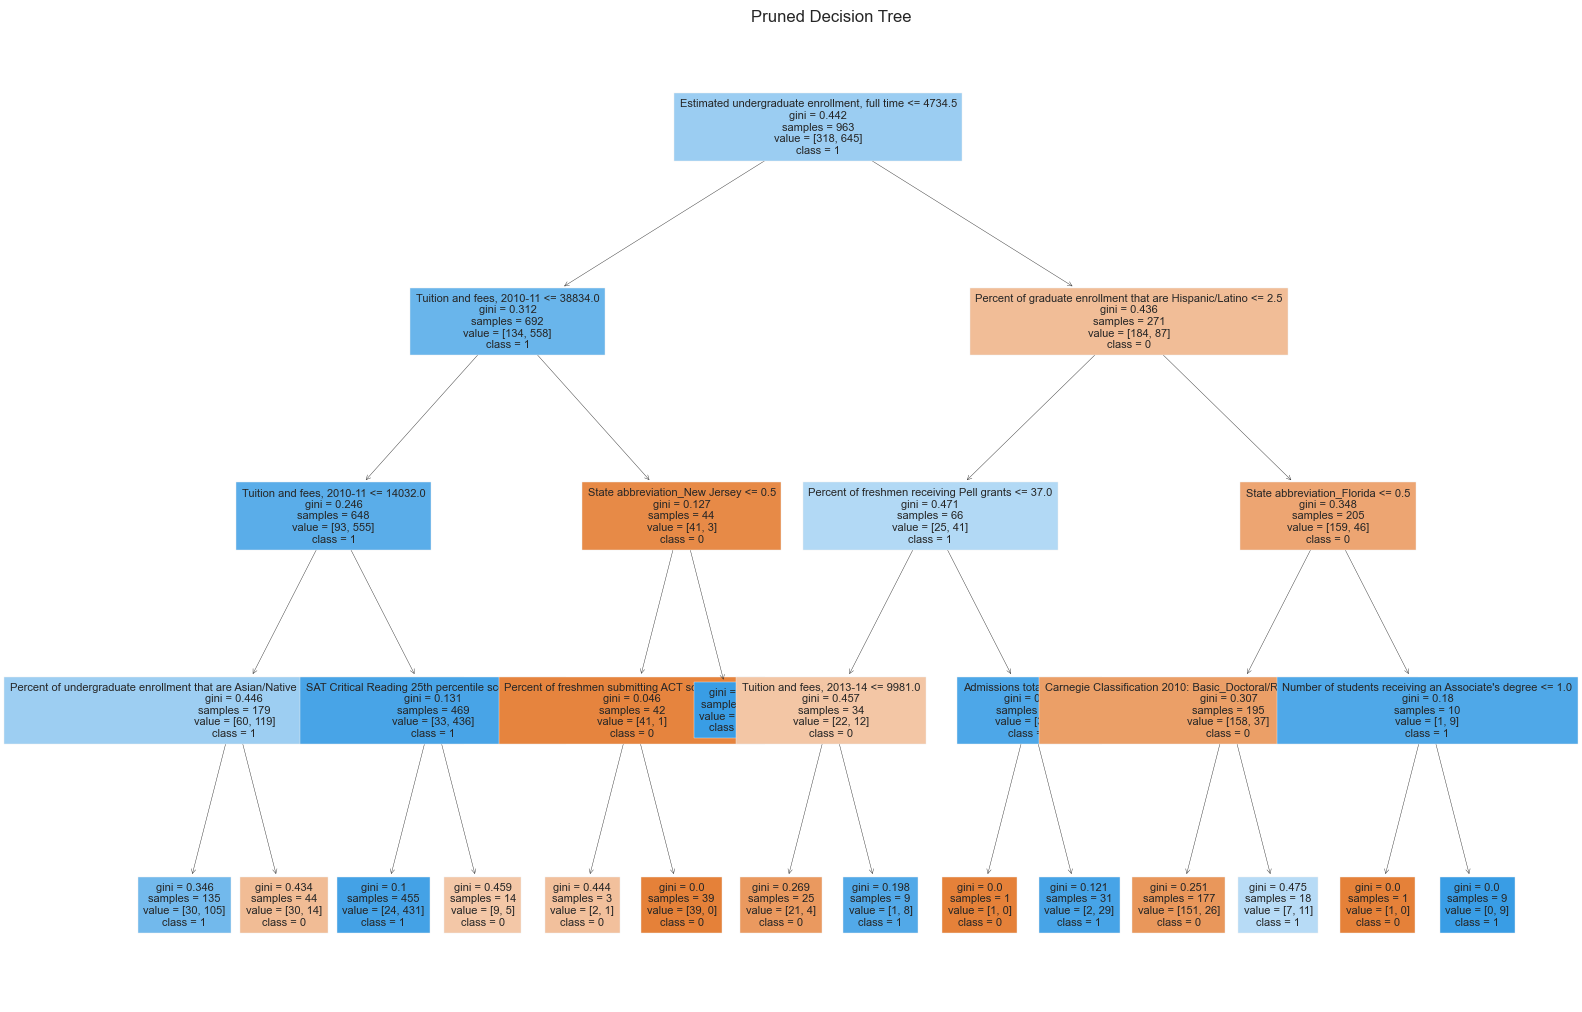

In [30]:
plt.figure(figsize=(16, 12))
plot_tree(dt_best, filled=True, feature_names=X.columns, class_names=['0', '1'], fontsize = 8)
plt.title("Pruned Decision Tree")
plt.show()


In [31]:
y_prob = dt_best.predict_proba(X_test)[:, 1]  # Probability of the positive class
y_pred = dt_best.predict(X_test)  # Predicted labels

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)  # Use predicted probabilities for ROC AUC

# Print or use the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8429951690821256
Confusion Matrix:
 [[104  35]
 [ 30 245]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76       139
           1       0.88      0.89      0.88       275

    accuracy                           0.84       414
   macro avg       0.83      0.82      0.82       414
weighted avg       0.84      0.84      0.84       414

ROC AUC Score: 0.8584695879659907


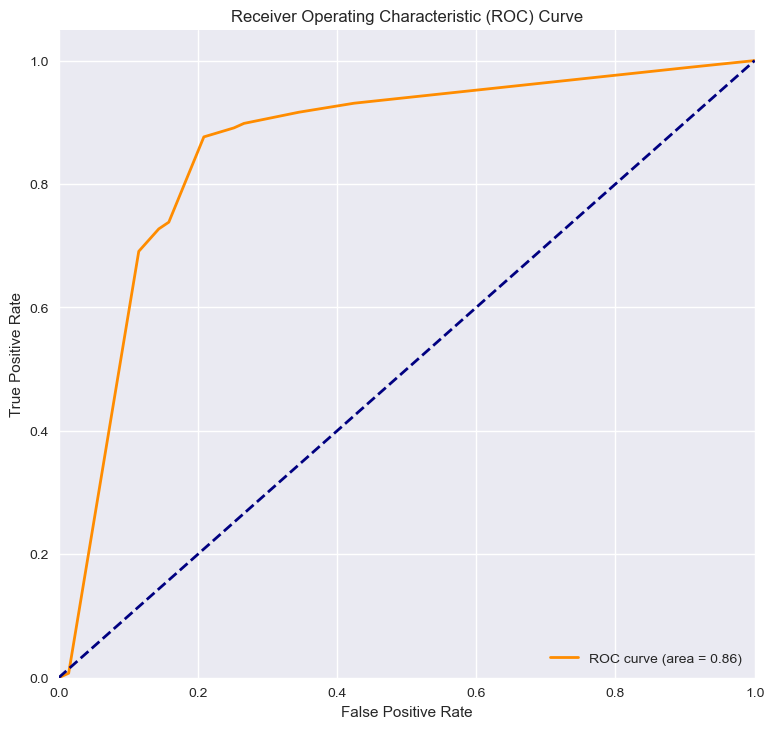

ROC AUC Score: 0.8584695879659907


In [32]:
y_prob = dt_best.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("ROC AUC Score:", roc_auc)

## NEEDS SUMMARY

## Step 4 Random Forest

In [33]:
# Create the model, fit the model, predeict on the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [34]:
# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

# Print or use the evaluation metrics
print("Step 2: Evaluate Random Forest Classifier")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc)

Step 2: Evaluate Random Forest Classifier
Accuracy: 0.8961352657004831
Confusion Matrix:
 [[114  25]
 [ 18 257]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       139
           1       0.91      0.93      0.92       275

    accuracy                           0.90       414
   macro avg       0.89      0.88      0.88       414
weighted avg       0.90      0.90      0.90       414

ROC AUC Score: 0.9427992151733159


In [35]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters from the grid search
best_params = grid_search.best_params_
print(best_params)

{'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 100}


In [36]:
# Fit the final Random Forest model with the best hyperparameters
rf_best = RandomForestClassifier(random_state=42, **best_params)
rf_best.fit(X_train, y_train)

# Explain the importance of each predictor
feature_importance = list(zip(X_train.columns, rf_best.feature_importances_))
feature_importance.sort(key=lambda x: x[1], reverse=True)

print("\nStep 5: Feature Importance")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")


Step 5: Feature Importance
Estimated undergraduate enrollment, full time: 0.0374
Tuition and fees, 2011-12: 0.0328
Tuition and fees, 2010-11: 0.0312
Estimated freshman undergraduate enrollment, total: 0.0296
Tuition and fees, 2012-13: 0.0288
Full-time undergraduate enrollment: 0.0271
Graduation rate - Bachelor degree within 6 years, total: 0.0243
Tuition and fees, 2013-14: 0.0238
Enrolled total: 0.0234
Percent of freshmen receiving Pell grants: 0.0232
Undergraduate enrollment: 0.0231
Estimated enrollment, total: 0.0224
Total price for out-of-state students living on campus 2013-14: 0.0223
Applicants total: 0.0207
Total price for in-state students living on campus 2013-14: 0.0207
Full-time enrollment: 0.0196
Percent of freshmen  receiving federal grant aid: 0.0191
Estimated enrollment, full time: 0.0184
Graduation rate - Bachelor degree within 5 years, total: 0.0167
Estimated undergraduate enrollment, total: 0.0164
Total  enrollment: 0.0160
Graduation rate - Bachelor degree within 4 ye

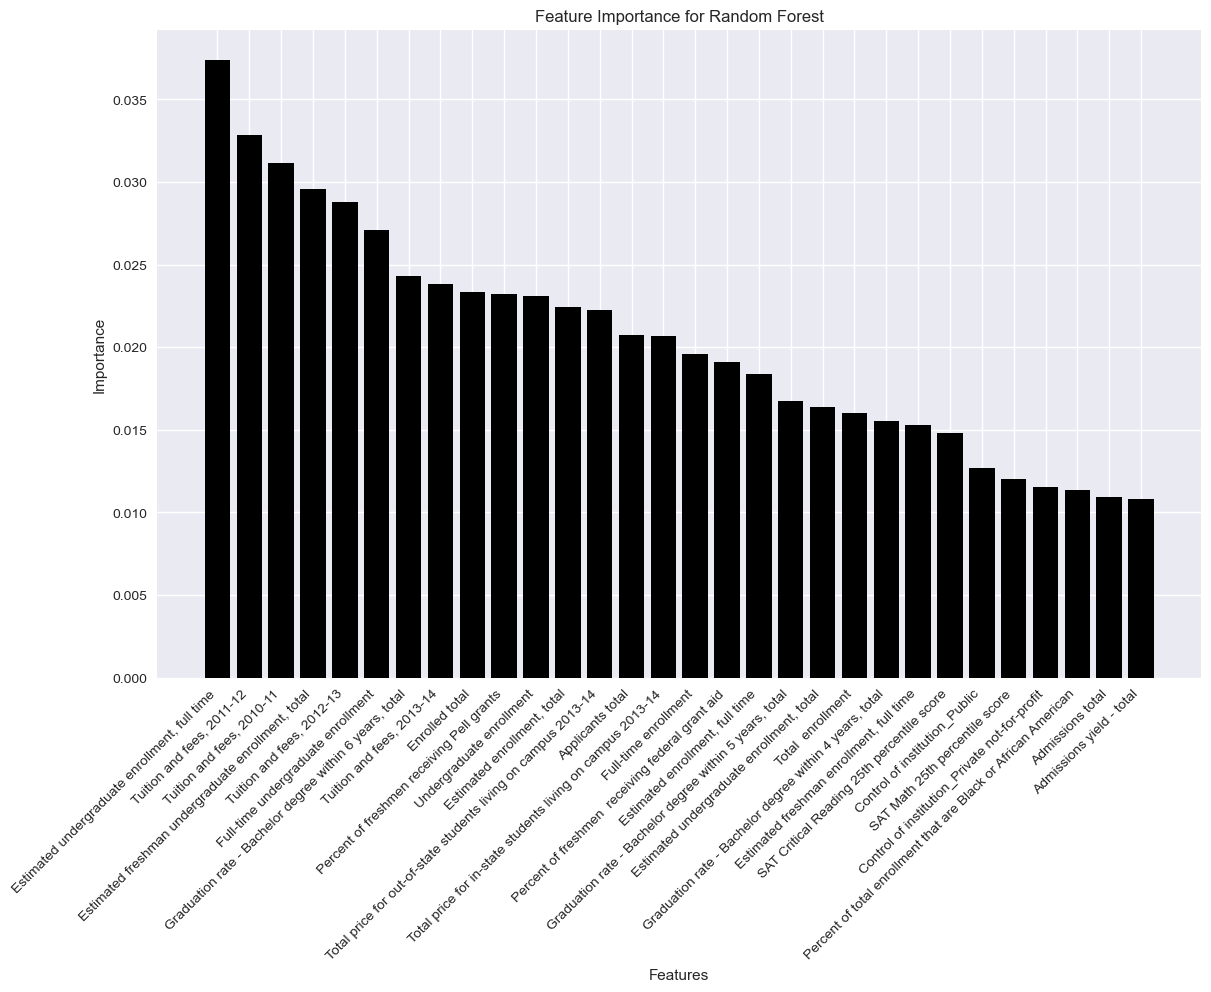

In [37]:
features, importances = zip(*feature_importance)

# Create a bar plot to visualize the importance of the features
plt.figure(figsize=(12, 8))
plt.bar(features[:30], importances[:30], color='Black')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Random Forest')
plt.xticks(rotation=45, ha='right')
plt.show()

In [38]:
y_pred_best = rf_best.predict(X_test)
y_prob_best = rf_best.predict_proba(X_test)[:, 1]

# Calculate accuracy and other metrics for the final model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_prob_best)

# Calculate sensitivity and specificity
tn, fp, fn, tp = conf_matrix_best.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print or use the evaluation metrics for the final model
print("\nStep 6: Evaluate Final Random Forest Model")
print("Accuracy:", accuracy_best)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("ROC AUC Score:", roc_auc_best)
print("Confusion Matrix:\n", conf_matrix_best)
print("Classification Report:\n", classification_rep_best)


Step 6: Evaluate Final Random Forest Model
Accuracy: 0.8913043478260869
Sensitivity: 0.9381818181818182
Specificity: 0.7985611510791367
ROC AUC Score: 0.9404708960104643
Confusion Matrix:
 [[111  28]
 [ 17 258]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       139
           1       0.90      0.94      0.92       275

    accuracy                           0.89       414
   macro avg       0.88      0.87      0.88       414
weighted avg       0.89      0.89      0.89       414



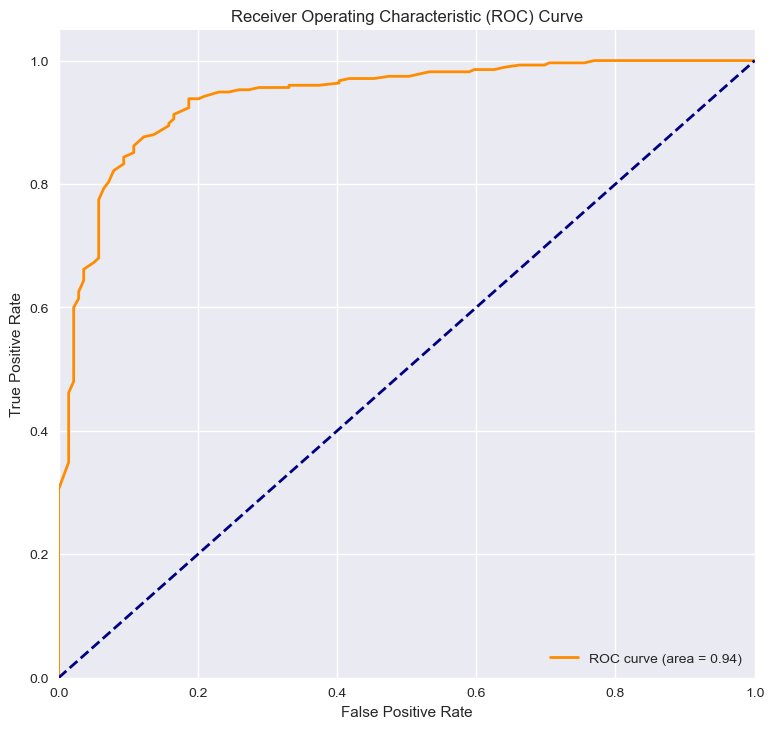

In [39]:
y_prob_best = rf_best.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)

# Calculate the ROC AUC score
roc_auc_best = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_best))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## NEEDS SUMMARY

## Step 5

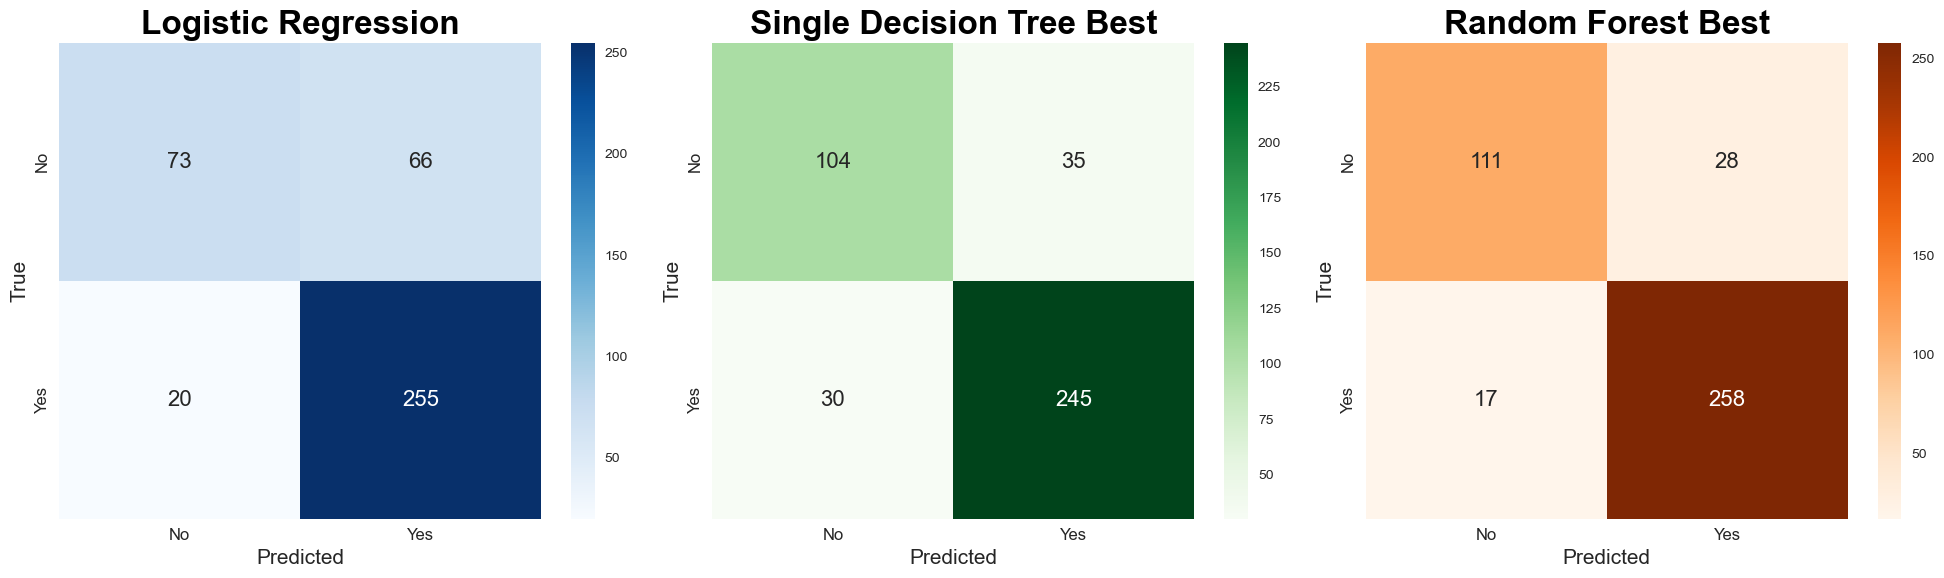

In [40]:
y_pred_logistic = logreg_model.predict(X_test)
y_pred_dt_best = dt_best.predict(X_test)
y_pred_rf_best = rf_best.predict(X_test)

# Calculate confusion matrices
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
cm_dt_best = confusion_matrix(y_test, y_pred_dt_best)
cm_rf_best = confusion_matrix(y_test, y_pred_rf_best)

# Plot the confusion matrices side by side
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.title('Logistic Regression', fontweight='bold', color='black', fontsize='24', horizontalalignment='center')
chart_logistic = sns.heatmap(cm_logistic, annot=True, cmap="Blues", annot_kws={"size": 16}, fmt="g")
chart_logistic.set_xlabel('Predicted', fontsize=15)
chart_logistic.set_ylabel('True', fontsize=15)
chart_logistic.xaxis.set_ticklabels(['No', 'Yes'], fontsize=12)
chart_logistic.yaxis.set_ticklabels(['No', 'Yes'], fontsize=12, va='center')

plt.subplot(132)
plt.title('Single Decision Tree Best', fontweight='bold', color='black', fontsize='24', horizontalalignment='center')
chart_dt_best = sns.heatmap(cm_dt_best, annot=True, cmap="Greens", annot_kws={"size": 16}, fmt="g")
chart_dt_best.set_xlabel('Predicted', fontsize=15)
chart_dt_best.set_ylabel('True', fontsize=15)
chart_dt_best.xaxis.set_ticklabels(['No', 'Yes'], fontsize=12)
chart_dt_best.yaxis.set_ticklabels(['No', 'Yes'], fontsize=12, va='center')

plt.subplot(133)
plt.title('Random Forest Best', fontweight='bold', color='black', fontsize='24', horizontalalignment='center')
chart_rf_best = sns.heatmap(cm_rf_best, annot=True, cmap="Oranges", annot_kws={"size": 16}, fmt="g")
chart_rf_best.set_xlabel('Predicted', fontsize=15)
chart_rf_best.set_ylabel('True', fontsize=15)
chart_rf_best.xaxis.set_ticklabels(['No', 'Yes'], fontsize=12)
chart_rf_best.yaxis.set_ticklabels(['No', 'Yes'], fontsize=12, va='center')

plt.tight_layout()
plt.show()

In [41]:
y_pred_logi_best = logreg_model.predict(X_test)
y_pred_dt_best = dt_best.predict(X_test)
y_pred_rf_best = rf_best.predict(X_test)

# Create a DataFrame to store the predictions
df_scores = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Best', 'Random Forest Best'],
    'Accuracy': [accuracy_score(y_test, y_pred_logi_best), accuracy_score(y_test, y_pred_dt_best), accuracy_score(y_test, y_pred_rf_best)],
    'ROC AUC': [roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1]), roc_auc_score(y_test, dt_best.predict_proba(X_test)[:, 1]), roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1])],
    # Add more metrics as needed
})
print(df_scores)

                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.792271  0.808398
1   Decision Tree Best  0.842995  0.858470
2   Random Forest Best  0.891304  0.940471


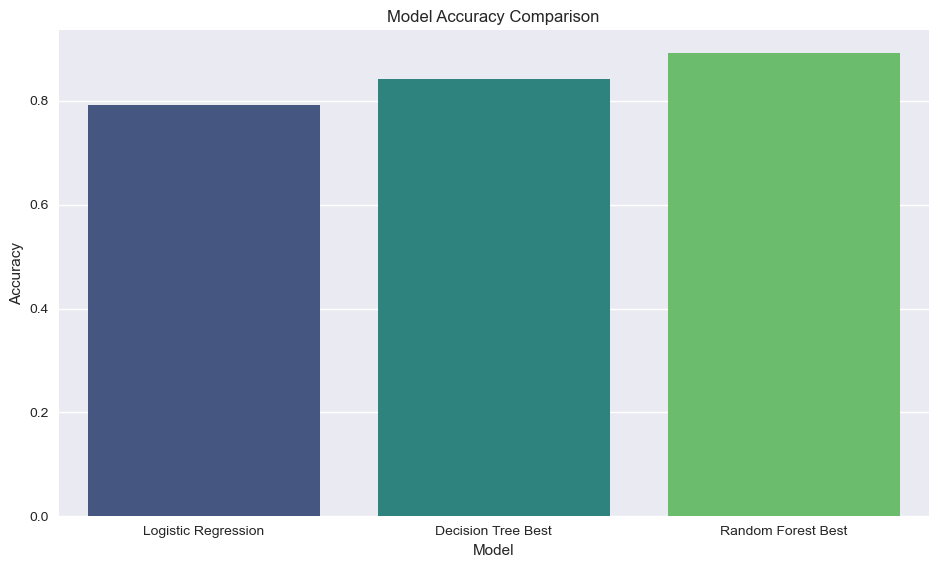

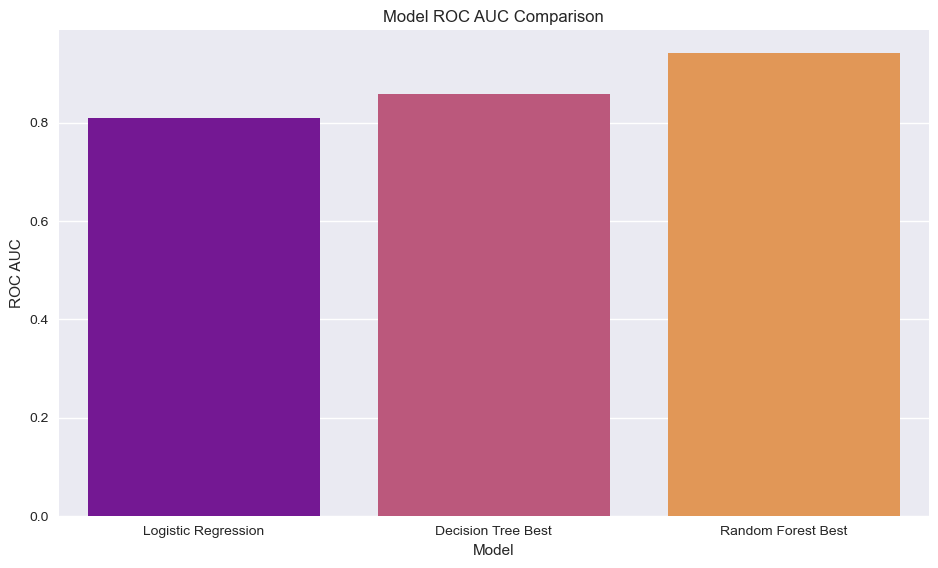

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_scores, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.show()

# Bar plot for ROC AUC
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='ROC AUC', data=df_scores, palette='plasma')
plt.title('Model ROC AUC Comparison')
plt.show()

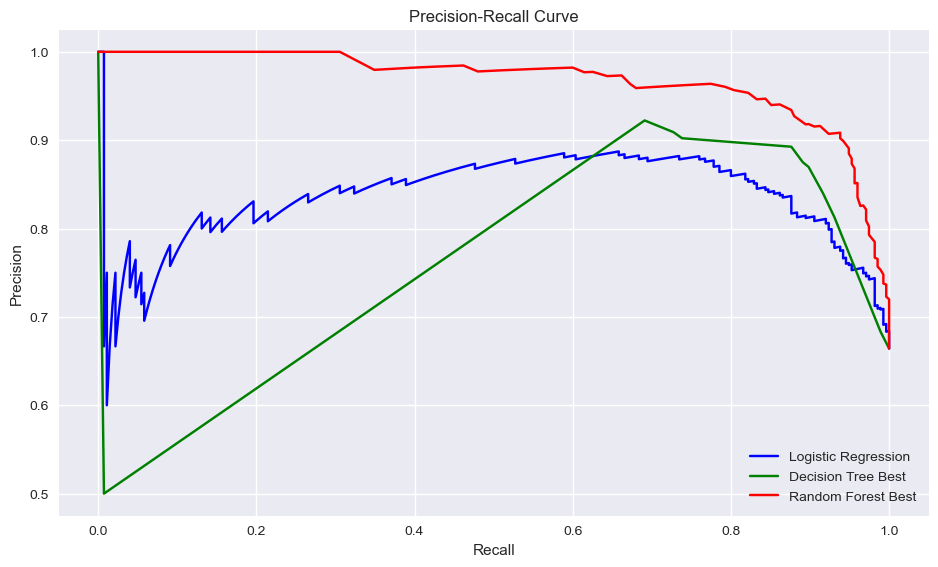

In [43]:
precision_logi_best, recall_logi_best, _ = precision_recall_curve(y_test, logreg_model.predict_proba(X_test)[:, 1])
precision_dt_best, recall_dt_best, _ = precision_recall_curve(y_test, dt_best.predict_proba(X_test)[:, 1])
precision_rf_best, recall_rf_best, _ = precision_recall_curve(y_test, rf_best.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(recall_logi_best, precision_logi_best, label='Logistic Regression', color='blue')
plt.plot(recall_dt_best, precision_dt_best, label='Decision Tree Best', color='green')
plt.plot(recall_rf_best, precision_rf_best, label='Random Forest Best', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

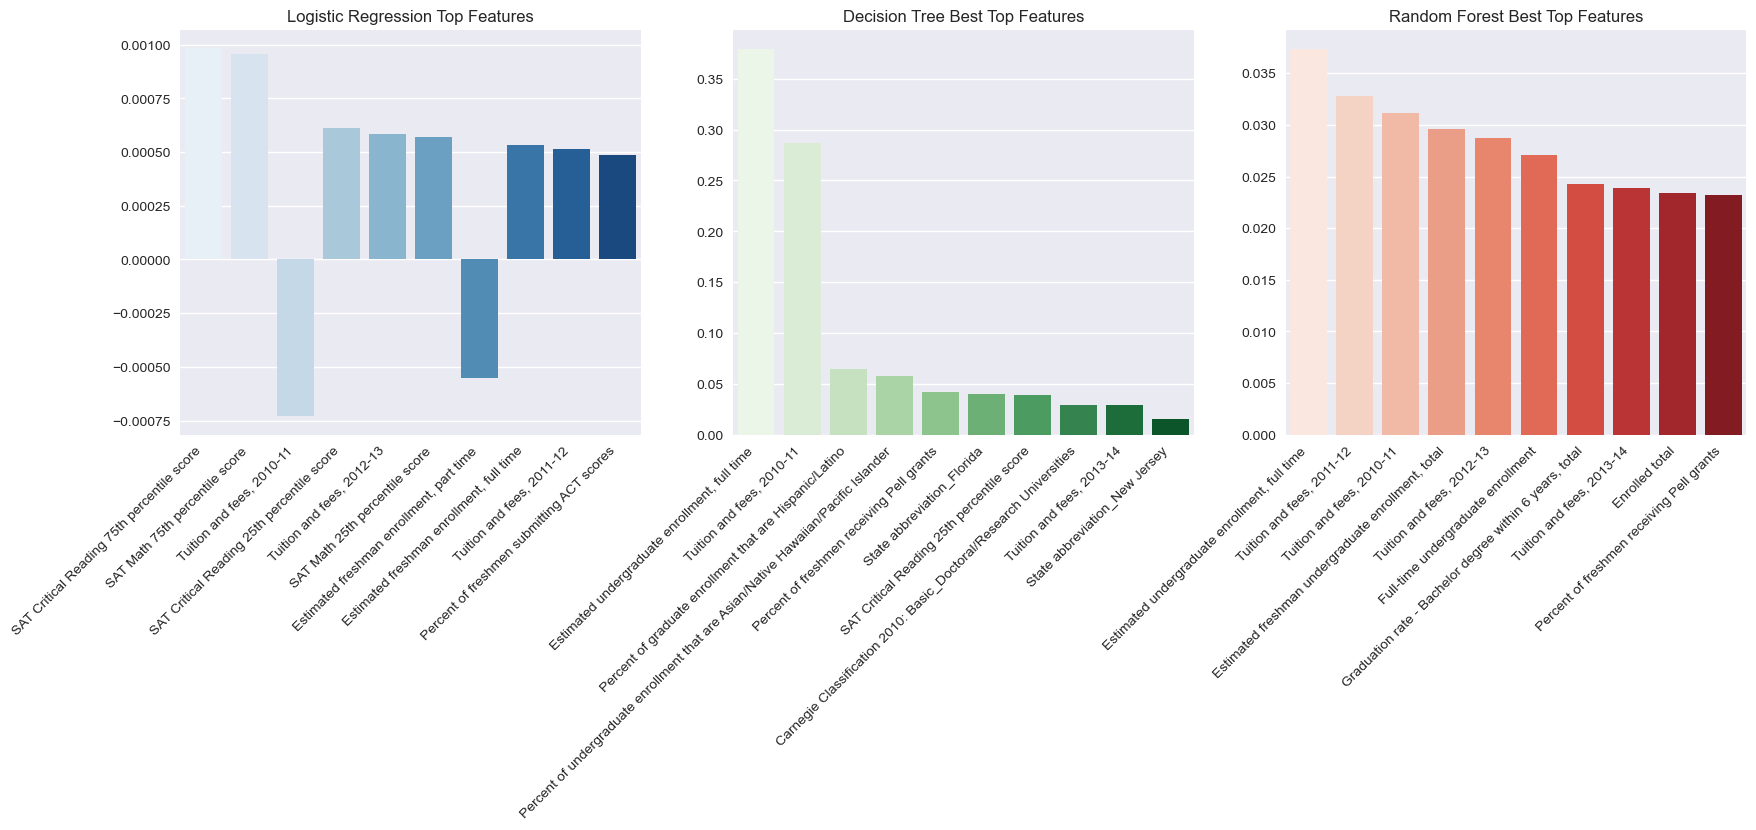

In [44]:
# Extract feature importances for Logistic Regression
feature_importance_logi_best = list(zip(X_train.columns, logreg_model.coef_[0]))
feature_importance_logi_best.sort(key=lambda x: abs(x[1]), reverse=True)
top_features_logi_best = feature_importance_logi_best[:10]

# Extract feature importances for Decision Tree Best
feature_importance_dt_best = list(zip(X_train.columns, dt_best.feature_importances_))
feature_importance_dt_best.sort(key=lambda x: x[1], reverse=True)
top_features_dt_best = feature_importance_dt_best[:10]

# Extract feature importances for Random Forest Best
feature_importance_rf_best = list(zip(X_train.columns, rf_best.feature_importances_))
feature_importance_rf_best.sort(key=lambda x: x[1], reverse=True)
top_features_rf_best = feature_importance_rf_best[:10]

# Plotting the top ten features for each model
plt.figure(figsize=(18, 5))

# Logistic Regression
plt.subplot(131)
sns.barplot(x=[f[0] for f in top_features_logi_best], y=[f[1] for f in top_features_logi_best], palette='Blues')
plt.xticks(rotation=45, ha='right')
plt.title('Logistic Regression Top Features')

# Decision Tree Best
plt.subplot(132)
sns.barplot(x=[f[0] for f in top_features_dt_best], y=[f[1] for f in top_features_dt_best], palette='Greens')
plt.xticks(rotation=45, ha='right')
plt.title('Decision Tree Best Top Features')

# Random Forest Best
plt.subplot(133)
sns.barplot(x=[f[0] for f in top_features_rf_best], y=[f[1] for f in top_features_rf_best], palette='Reds')
plt.xticks(rotation=45, ha='right')
plt.title('Random Forest Best Top Features')

plt.show()

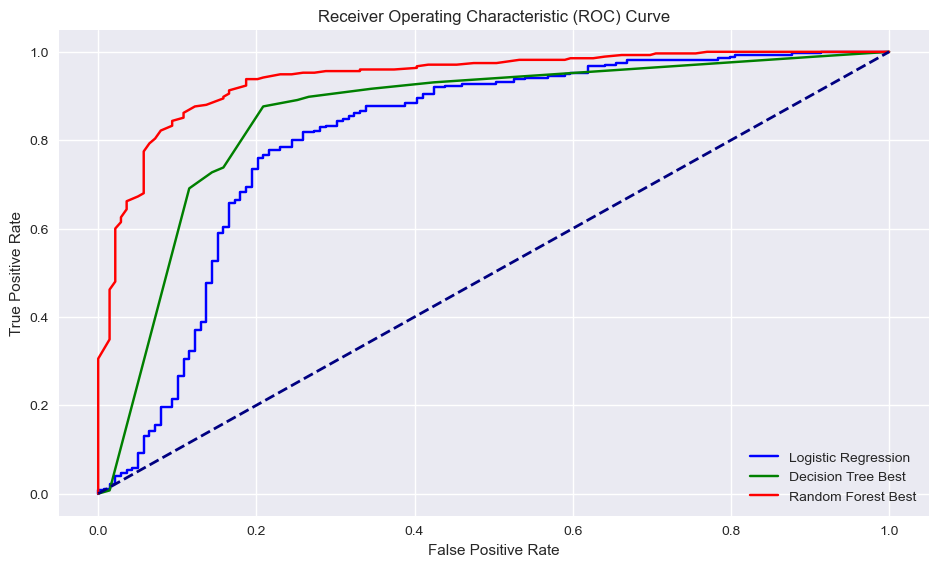

In [45]:
from sklearn.metrics import roc_curve, auc

fpr_logi_best, tpr_logi_best, _ = roc_curve(y_test, logreg_model.predict_proba(X_test)[:, 1])
fpr_dt_best, tpr_dt_best, _ = roc_curve(y_test, dt_best.predict_proba(X_test)[:, 1])
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test, rf_best.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_logi_best, tpr_logi_best, label='Logistic Regression', color='blue')
plt.plot(fpr_dt_best, tpr_dt_best, label='Decision Tree Best', color='green')
plt.plot(fpr_rf_best, tpr_rf_best, label='Random Forest Best', color='red')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Step 6 Lasso